# Project Template

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [82]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
import random

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection and Evaluation
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

# ML modesl 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, AdaBoostRegressor

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error

# Learning Curve
from sklearn.model_selection import learning_curve

In [1]:
# load the data
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [4]:
# display all columns
pd.set_option('display.max_columns', None)

In [5]:
# see what we imported (data is a dictionary)
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

In [7]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [8]:
# shape of the data
df.shape

(442, 11)

In [9]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [10]:
for col in df.columns:
    shape_info = f"The shape of the column \033[94m{col}\033[0m is \033[92m{df[col].shape}\033[0m and it has \033[91m{df[col].isnull().sum()}\033[0m null values"
    print(shape_info)

The shape of the column age is (442,) and it has 0 null values
The shape of the column sex is (442,) and it has 0 null values
The shape of the column bmi is (442,) and it has 0 null values
The shape of the column bp is (442,) and it has 0 null values
The shape of the column s1 is (442,) and it has 0 null values
The shape of the column s2 is (442,) and it has 0 null values
The shape of the column s3 is (442,) and it has 0 null values
The shape of the column s4 is (442,) and it has 0 null values
The shape of the column s5 is (442,) and it has 0 null values
The shape of the column s6 is (442,) and it has 0 null values
The shape of the column target is (442,) and it has 0 null values


We dont have missing values

In [11]:
# summary statistics for every column
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [13]:
print(df.describe().loc[['min','max']])

          age       sex       bmi        bp        s1        s2        s3  \
min -0.107226 -0.044642 -0.090275 -0.112399 -0.126781 -0.115613 -0.102307   
max  0.110727  0.050680  0.170555  0.132044  0.153914  0.198788  0.181179   

           s4        s5        s6  target  
min -0.076395 -0.126097 -0.137767    25.0  
max  0.185234  0.133597  0.135612   346.0  


**Features**
 - real, -0,2 ~< x ~< 0,2

**Target**
 - integer 25 - 346

We see that the values are already scaled with z score , the BMI shows it clears as the BMI takes values positive and greater than 15 most of the time. So a  major preprocessing was already taken place, maybe because the rest features are some kind of blood markers.


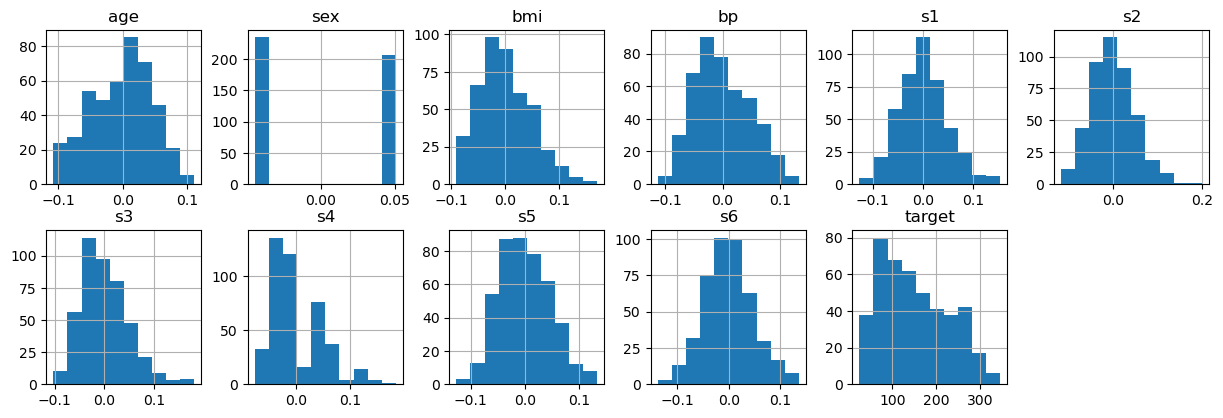

In [16]:
# the distribution of the columns of the dataframe
df.hist(layout=(6, 6), figsize=(15, 15))
plt.show()

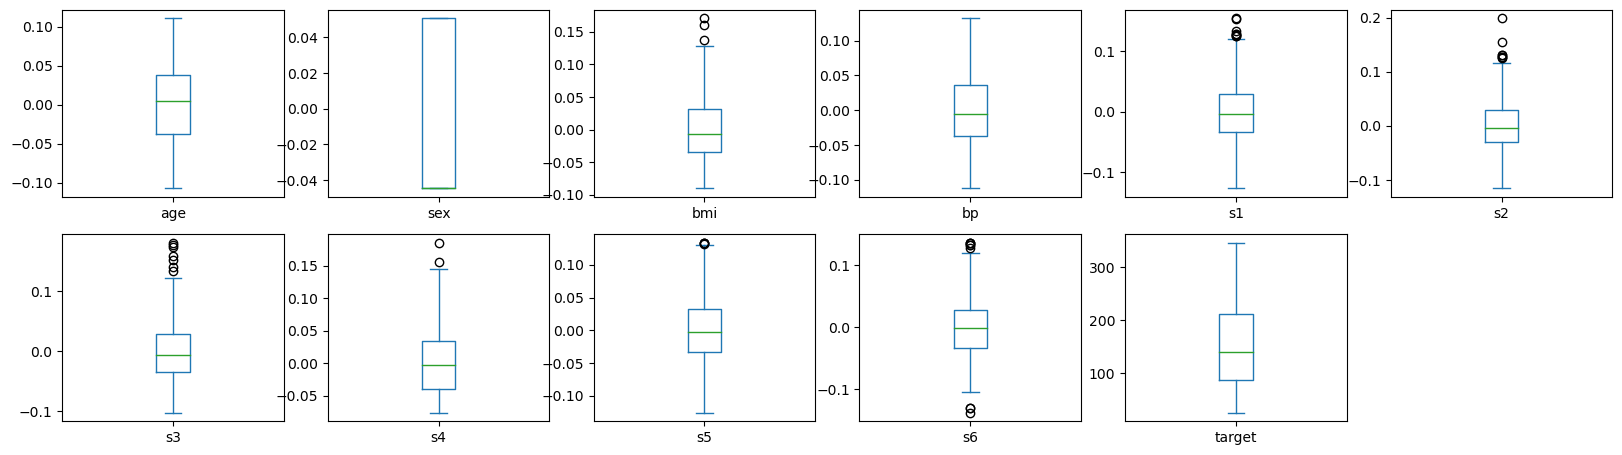

In [18]:
df.plot(kind='box', subplots=True, layout=(6,6),figsize=[20,17], sharex=False, sharey=False)
plt.show()

/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: >

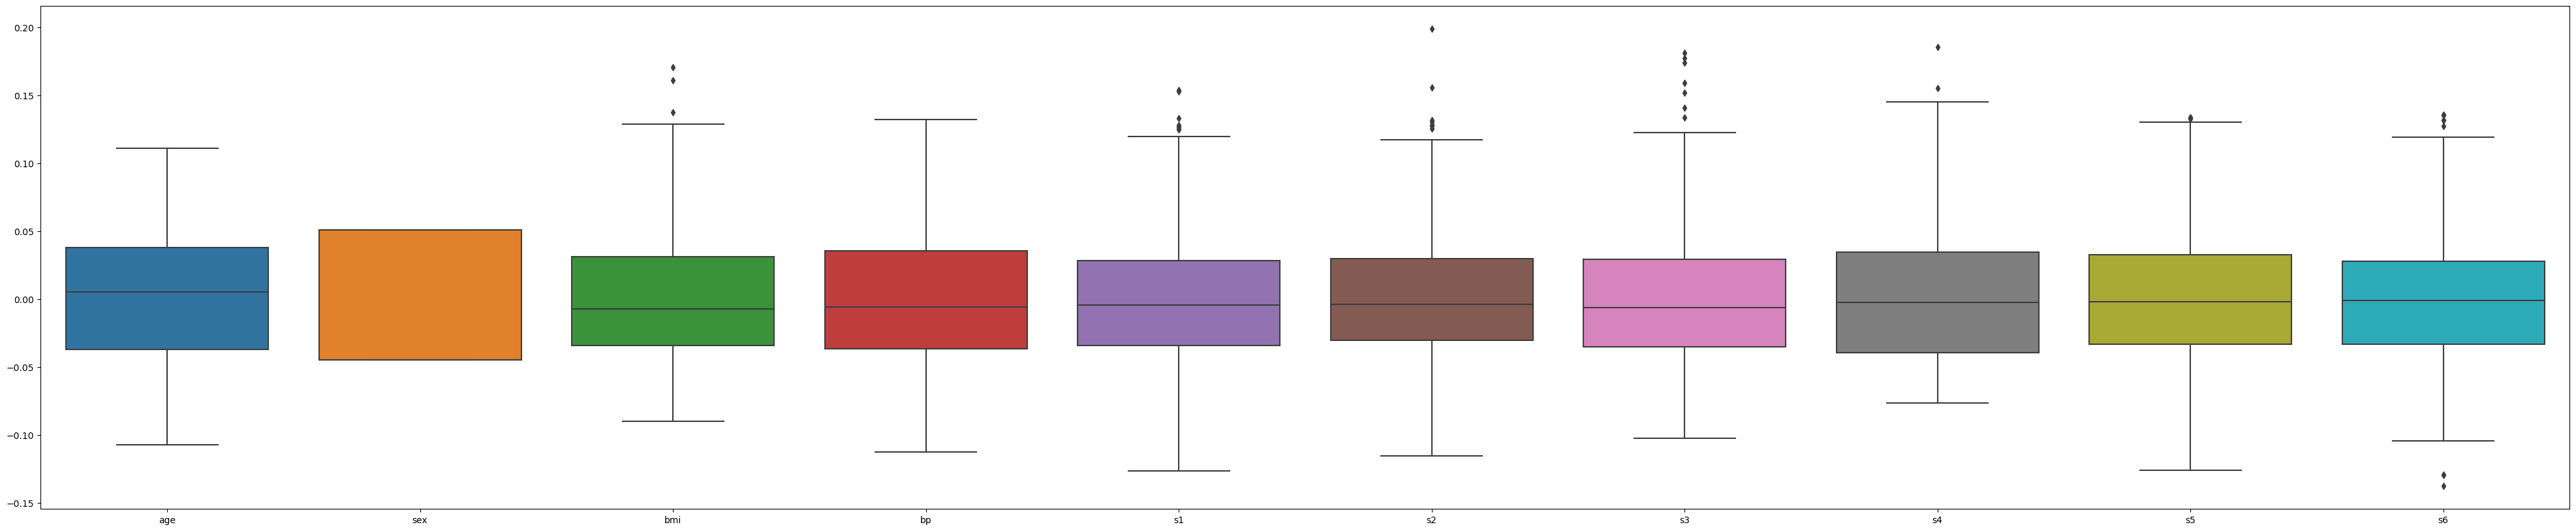

In [20]:
# ploting all the columns against each other
plt.figure(figsize=(50,10))
sns.boxplot(data=df.drop('target', axis=1))

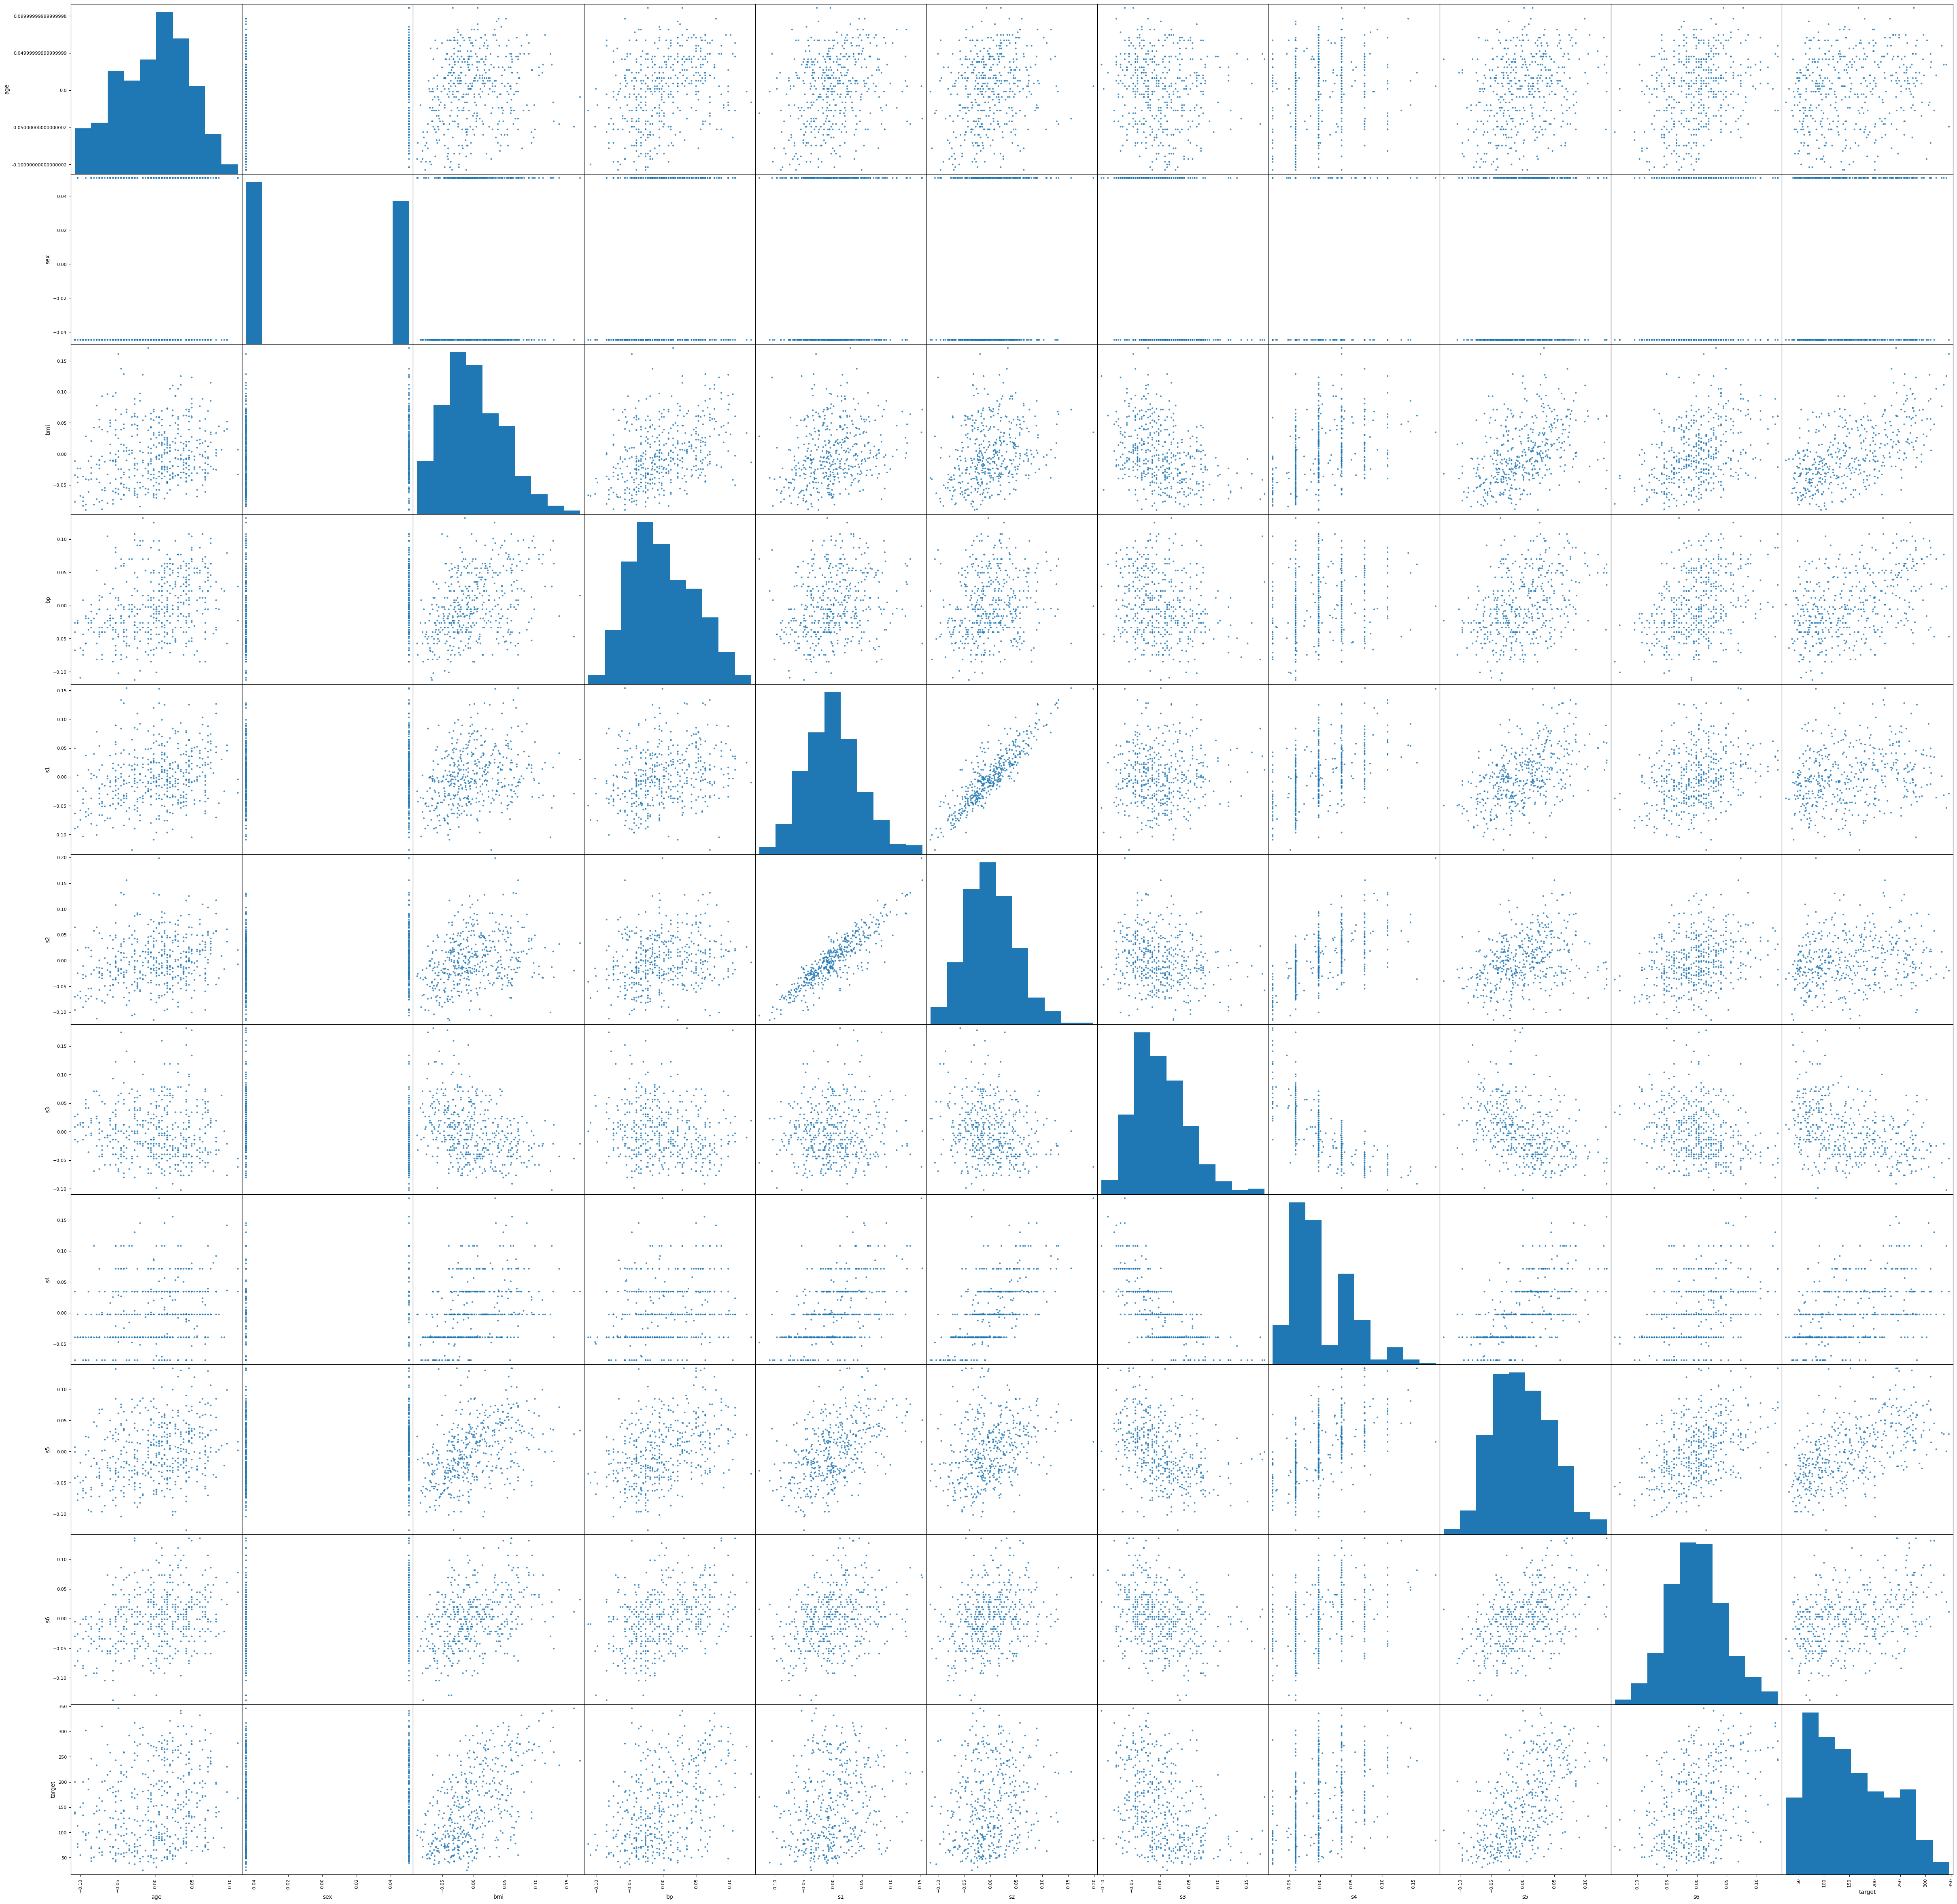

In [21]:
scatter_matrix(df, alpha=0.8, diagonal='hist', figsize=(60, 60))
plt.show()

We see the s4 has some horizontal lines wiht all the other features, this could mean that the s4 has somewhat categorical values (because the lines are the same across all features)

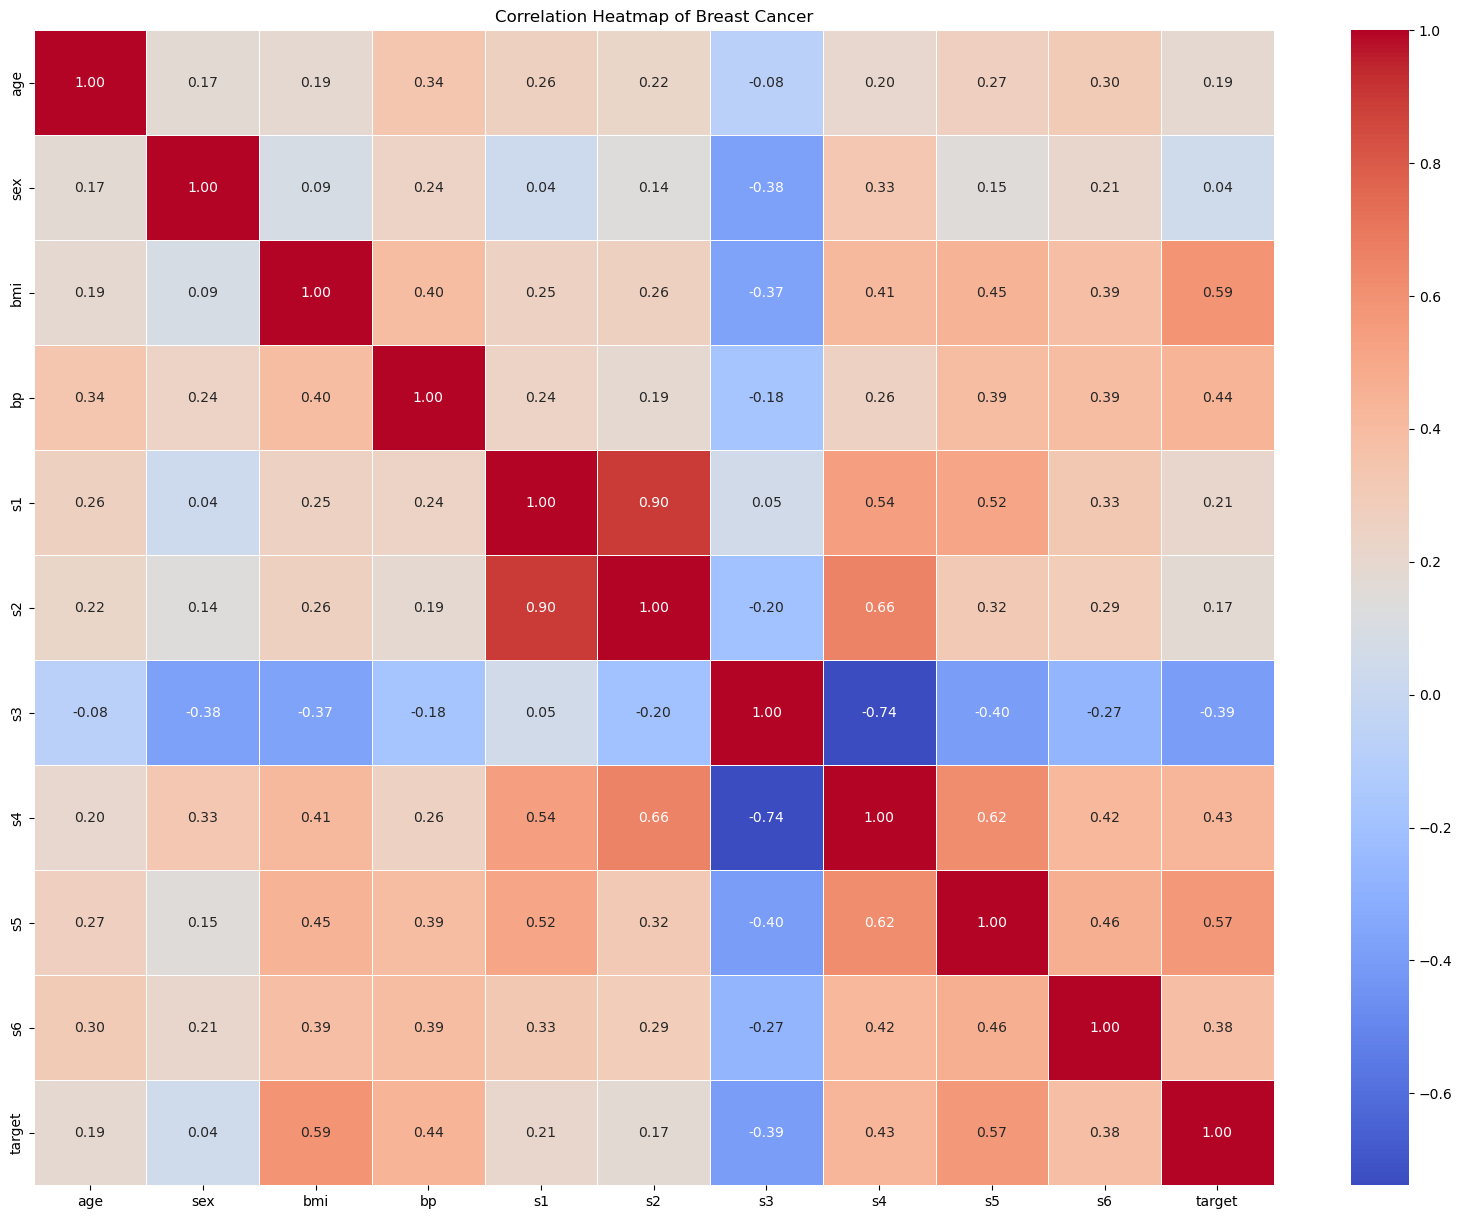

In [22]:
# see the correlation between the variables wiht a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(method= 'pearson'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Breast Cancer')
plt.show()

We see some outliers but not many, also all of our data seem to have the same distributions except s4

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

Data already preparted for us. We only might drop the s1 or s2 ( both of their distributions are normal)

In [25]:
# Calculate absolute sums of correlations
correlation_matrix = df.corr().abs()
absolute_sums = correlation_matrix.sum(axis=1)

In [26]:
absolute_sums.sort_values(ascending=False)

s4        5.613454
s5        5.141174
s6        4.443353
target    4.418567
bmi       4.381509
s2        4.344544
s1        4.331211
bp        4.061665
s3        4.053374
age       3.212969
sex       2.793139
dtype: float64

The s1 and s2 having both similar correlation sums, so we will drop onw of the random

In [28]:
list = ['s1', 's2']
# Randomly select one of the 2 valus from the list
selected_key = random.choice(list)
print("Selected Key:", selected_key)


Selected Key: s2


In [29]:
df_after_corr = df.drop(['s2'], axis=1)

In [30]:
df_after_corr

age       sex       bmi        bp        s1        s3        s4  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.043401 -0.002592   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449  0.074412 -0.039493   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.032356 -0.002592   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191 -0.036038  0.034309   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.008142 -0.002592   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.028674 -0.002592   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341 -0.028674  0.034309   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.024993 -0.011080   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318 -0.028674  0.026560   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.173816 -0.039493   

           s5        s6  target  
0    0.019907 -0.017646   151.0  
1   -0.068332 -0.092204    75.0  
2    0.002861 -0.025930   141.0  
3    0.022688 -0.009362   206.0  
4   -0.031988 -0.046641   135.0  
..        ...       ...     ...  
437  0.031193  0.007207   178.0  
438 -0.018114  0.044485   104.0  
439 -0.046883  0.015491   132.0  
440  0.044529 -0.025930   220.0  
441 -0.004222  0.003064    57.0  

[442 rows x 10 columns]

## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

Data already prepared for us

## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

In [43]:
df_after_corr.iloc[:,9].head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [44]:
array = df_after_corr.values
X = array[:,0:9]
Y = array[:,9]

# original dataset
array_2 = df.values
x = array_2[:,0:10]
y = array_2[:,10]

In [45]:
# the X ,Y is the dataset wihtout the correlation
dataset ={
    'original': (x,y),
    'filtered': (X,Y)
}

In [53]:
# initialize the kfold 
kfold = KFold(n_splits=10, shuffle=True, random_state=9)

# use RMSE for better understanding of the error
scoring='neg_root_mean_squared_error'

In [49]:
algorithms = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

In [56]:
algorithms_names = [
    'Linear Regression',
    'Ridge',
    'Lasso',
    'Elastic Net',
    'K Neighbors Regressor',
    'Decision Tree Regressor'
]

In [59]:
i = 0
for algorithm in algorithms:
    model_name = algorithms_names[i]
    i += 1
    
    for stage, (features, target) in dataset.items():
        accuracy_scores = cross_val_score(algorithm, features, target, cv=kfold, scoring=scoring)
        print(f"{model_name} - {stage}: Mean Accuracy - {accuracy_scores.mean()}, Std Dev - {accuracy_scores.std()}")


Linear Regression - original: Mean Accuracy - -54.157849031487004, Std Dev - 7.672541221286741
Linear Regression - filtered: Mean Accuracy - -54.174799545139784, Std Dev - 7.733885669992444
Ridge - original: Mean Accuracy - -57.63215251246076, Std Dev - 5.443378559225701
Ridge - filtered: Mean Accuracy - -57.679284864251414, Std Dev - 5.418442821004625
Lasso - original: Mean Accuracy - -61.909116156926665, Std Dev - 5.004436110267382
Lasso - filtered: Mean Accuracy - -61.909116156926665, Std Dev - 5.00443611026738
Elastic Net - original: Mean Accuracy - -76.65007271694697, Std Dev - 3.475067984353646
Elastic Net - filtered: Mean Accuracy - -76.65166836443862, Std Dev - 3.474952605067376
K Neighbors Regressor - original: Mean Accuracy - -60.362744526208374, Std Dev - 7.05296416882521
K Neighbors Regressor - filtered: Mean Accuracy - -60.22039393300336, Std Dev - 7.772902231428603
Decision Tree Regressor - original: Mean Accuracy - -81.79686415836767, Std Dev - 9.408790415875474
Decision

The closest to 0 the better , and we also see that we didnt lose inforamtion from dropping the s2 collumn

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

We pick the linear regression as our model! So lets apply 2 ensembler techinques to see how better the model might get. Because the data set is small we will not use an evaluation split.

In [60]:
# split the data into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=9)

In [73]:
linear_reg = LinearRegression()

bagging_regressor = BaggingRegressor(base_estimator=linear_reg, random_state=9)

param_dist = {
    'linear_bagging__n_estimators': [10, 50, 100, 200],
    'linear_bagging__max_samples': [0.1, 0.3, 0.5, 0.7], 
    'linear_bagging__max_features': [0.1, 0.3, 0.5, 0.7],  
    'linear_bagging__bootstrap_features': [True, False],
}

ensemble_model = VotingRegressor(estimators=[('linear_bagging', bagging_regressor)])

random_search = RandomizedSearchCV(
    estimator=ensemble_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=kfold, 
    random_state=9
)

random_search.fit(X_train, Y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Mean Cross-validated Score: ", random_search.best_score_)


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

Best Parameters:  {'linear_bagging__n_estimators': 50, 'linear_bagging__max_samples': 0.3, 'linear_bagging__max_features': 0.5, 'linear_bagging__bootstrap_features': False}
Best Mean Cross-validated Score:  0.38847254525574687


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

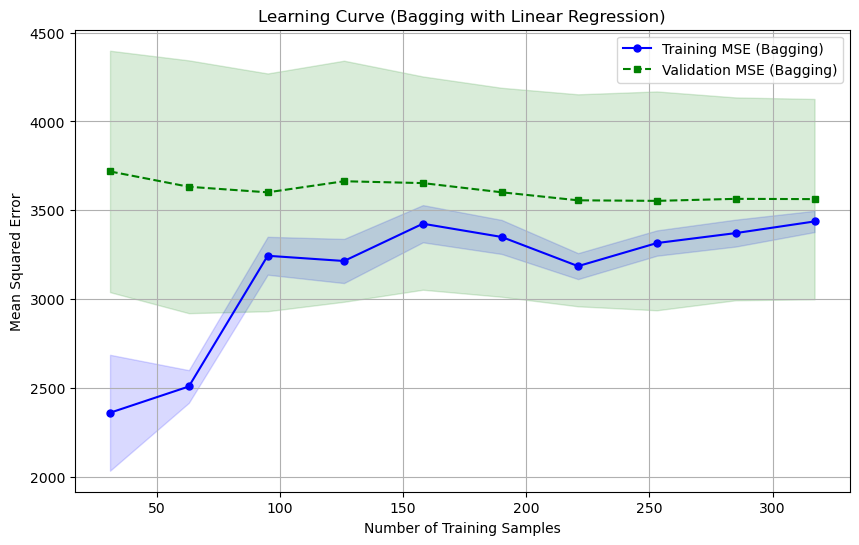

In [75]:

best_model_bagging = random_search.best_estimator_

train_sizes_bagging, train_scores_bagging, test_scores_bagging = learning_curve(
    best_model_bagging, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training set scores
train_mean_bagging = -np.mean(train_scores_bagging, axis=1)
train_std_bagging = np.std(train_scores_bagging, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean_bagging = -np.mean(test_scores_bagging, axis=1)
test_std_bagging = np.std(test_scores_bagging, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_bagging, train_mean_bagging, color='blue', marker='o', markersize=5, label='Training MSE (Bagging)')
plt.fill_between(train_sizes_bagging, train_mean_bagging - train_std_bagging, train_mean_bagging + train_std_bagging, alpha=0.15, color='blue')

plt.plot(train_sizes_bagging, test_mean_bagging, color='green', linestyle='--', marker='s', markersize=5, label='Validation MSE (Bagging)')
plt.fill_between(train_sizes_bagging, test_mean_bagging - test_std_bagging, test_mean_bagging + test_std_bagging, alpha=0.15, color='green')

plt.title('Learning Curve (Bagging with Linear Regression)')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [76]:
# Create AdaBoostRegressor as the boosting ensemble
boosting_regressor = AdaBoostRegressor(base_estimator=linear_reg, random_state=9)

# Define hyperparameter search space
param_dist = {
    'linear_boosting__n_estimators': [10, 50, 100, 200],
    'linear_boosting__learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
}

# Create the ensemble model
ensemble_model_boosting = VotingRegressor(estimators=[('linear_boosting', boosting_regressor)])

# Perform RandomizedSearchCV
random_search_boosting = RandomizedSearchCV(
    estimator=ensemble_model_boosting,
    param_distributions=param_dist,
    n_iter=10,
    cv=kfold,
    random_state=9
)

# Fit the model
random_search_boosting.fit(X_train, Y_train)

# Print results
print("Best Parameters: ", random_search_boosting.best_params_)
print("Best Mean Cross-validated Score: ", random_search_boosting.best_score_)


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

Best Parameters:  {'linear_boosting__n_estimators': 50, 'linear_boosting__learning_rate': 0.2}
Best Mean Cross-validated Score:  0.45079949767320493


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

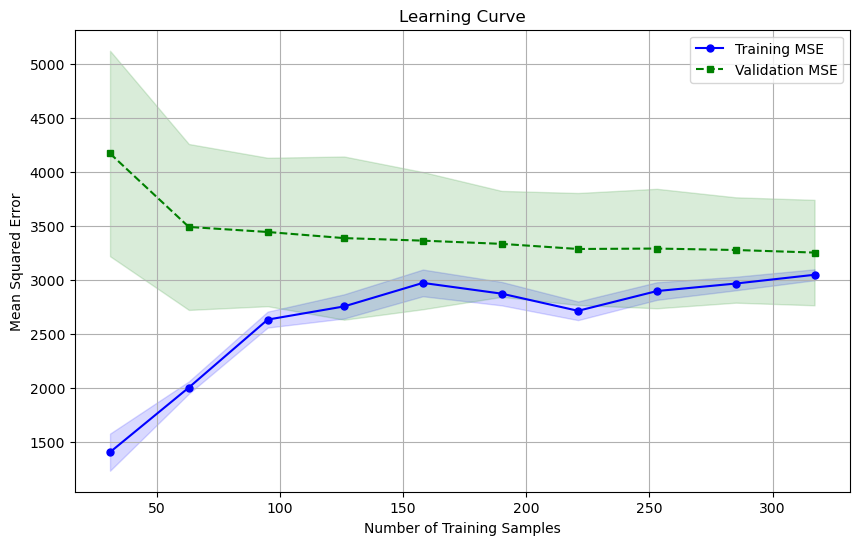

In [77]:
# Assuming you have the best model from the search
best_model = random_search_boosting.best_estimator_

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation MSE')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [80]:
# Create base model
linear_reg = LinearRegression()

# Define hyperparameter search space
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [False, True]
    # Add other hyperparameters if needed
}

# Perform RandomizedSearchCV
random_search_linear = RandomizedSearchCV(
    estimator=linear_reg,
    param_distributions=param_dist,
    n_iter=10,
    cv=kfold,
    random_state=9
)

# Fit the model
random_search_linear.fit(X_train, Y_train)

# Print results
print("Best Parameters: ", random_search_linear.best_params_)
print("Best Mean Cross-validated Score: ", random_search_linear.best_score_)



Best Parameters:  {'positive': False, 'fit_intercept': True, 'copy_X': True}
Best Mean Cross-validated Score:  0.43693016375637994


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


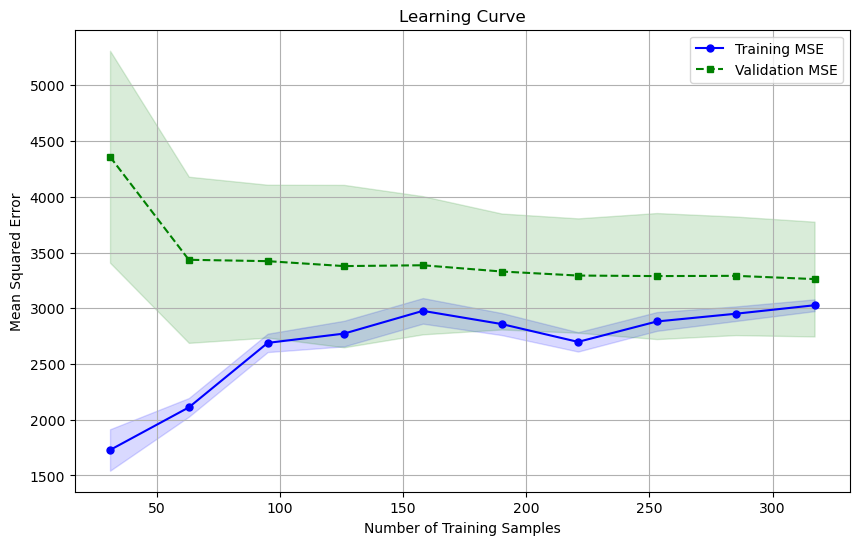

In [81]:
best_model = random_search_linear.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training MSE')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation MSE')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


We will keep the bagging regressor

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

In [ ]:
linear_reg = LinearRegression()

bagging_regressor = BaggingRegressor(base_estimator=linear_reg, random_state=9)

param_dist = {
    'linear_bagging__n_estimators': [10, 50, 100, 200],
    'linear_bagging__max_samples': [0.1, 0.3, 0.5, 0.7], 
    'linear_bagging__max_features': [0.1, 0.3, 0.5, 0.7],  
    'linear_bagging__bootstrap_features': [True, False],
}

ensemble_model = VotingRegressor(estimators=[('linear_bagging', bagging_regressor)])

random_search = RandomizedSearchCV(
    estimator=ensemble_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=kfold, 
    random_state=9
)

random_search.fit(X_train, Y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Mean Cross-validated Score: ", random_search.best_score_)


In [83]:
bagging_regressor = BaggingRegressor(
    base_estimator=LinearRegression(),
    n_estimators=50,
    max_samples=0.3,
    max_features=0.5,
    bootstrap_features=False,
    random_state=9
)

ensemble_model = VotingRegressor(estimators=[('linear_bagging', bagging_regressor)])

# Fit the final model on the entire training dataset
ensemble_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = ensemble_model.predict(X_test)

# Evaluate the performance on the test set (using Mean Squared Error as an example)
mse_test = mean_squared_error(Y_test, Y_pred)

print("Mean Squared Error on Test Set: ", mse_test)
# rmse
print("Root Mean Squared Error on Test Set: ", np.sqrt(mse_test))


Mean Squared Error on Test Set:  2572.4975561675014
Root Mean Squared Error on Test Set:  50.71979452016245


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

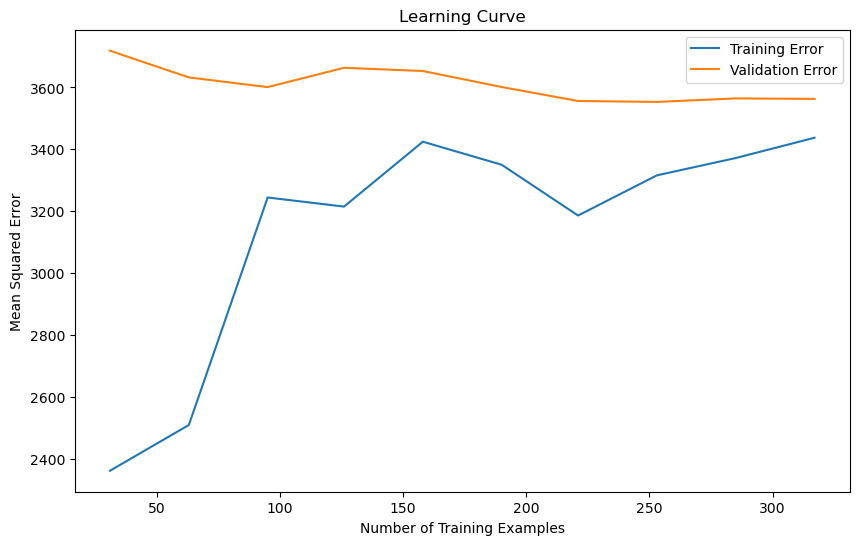

In [85]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    ensemble_model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Error')
plt.title('Learning Curve')
plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

We saw that the RMSE is about 50, a litle worse that